In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [10]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

target = iris.target_names
labels = iris.target

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

datapoints = PCAdf.values
m, f = datapoints.shape
k = 3
datapoints

array([[-6.30702931e-01,  1.07577910e-01, -1.87190977e-02],
       [-6.22904943e-01, -1.04259833e-01, -4.91420253e-02],
       [-6.69520395e-01, -5.14170597e-02,  1.96441728e-02],
       [-6.54152759e-01, -1.02884871e-01,  2.32185515e-02],
       [-6.48788056e-01,  1.33487576e-01,  1.51155243e-02],
       [-5.35272778e-01,  2.89615724e-01,  2.54378874e-02],
       [-6.56537790e-01,  1.07244911e-02,  9.18347789e-02],
       [-6.25780499e-01,  5.71335411e-02, -1.40277647e-02],
       [-6.75643504e-01, -2.00703283e-01,  3.59520802e-02],
       [-6.45644619e-01, -6.72080097e-02, -6.17055833e-02],
       [-5.97408238e-01,  2.17151953e-01, -5.12740810e-02],
       [-6.38943190e-01,  3.25988375e-02,  2.44981902e-02],
       [-6.61612593e-01, -1.15605495e-01, -5.47803418e-02],
       [-7.51967943e-01, -1.71313322e-01,  4.76777938e-02],
       [-6.00371589e-01,  3.80240692e-01, -8.51695344e-02],
       [-5.52157227e-01,  5.15255982e-01,  3.82732690e-02],
       [-5.77053593e-01,  2.93709492e-01

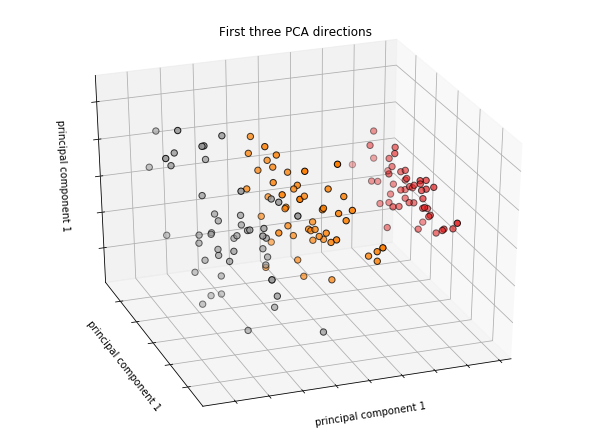

In [13]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [14]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
    
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)
medoids_initial

array([[-0.60037159,  0.38024069, -0.08516953],
       [-0.15863457, -0.28913985,  0.0524159 ],
       [ 0.21396272,  0.059963  , -0.11409813]])

In [15]:
def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    if len(medoids_shape) == 1:
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p
        
    return S

S = compute_d_p(datapoints, medoids_initial, 2)
S

array([[0.07968064, 0.3852937 , 0.7248244 ],
       [0.23654649, 0.26004161, 0.73153592],
       [0.20209589, 0.31859043, 0.81083493],
       [0.2480507 , 0.28108167, 0.79899978],
       [0.07328835, 0.42025569, 0.76644093],
       [0.02468474, 0.47754216, 0.6335645 ],
       [0.17102739, 0.33938008, 0.80260393],
       [0.11010499, 0.34254533, 0.71519075],
       [0.35783221, 0.27539032, 0.88186121],
       [0.20281054, 0.29945624, 0.75784222],
       [0.02775562, 0.45960533, 0.68697806],
       [0.13436964, 0.33499155, 0.74740623],
       [0.2505374 , 0.29459209, 0.80097502],
       [0.3448417 , 0.36595003, 1.01268223],
       [0.        , 0.66213165, 0.76655503],
       [0.03579188, 0.80211274, 0.81744851],
       [0.02127369, 0.51529454, 0.70108133],
       [0.08302796, 0.35731766, 0.68556492],
       [0.01509555, 0.47944961, 0.59289047],
       [0.0437377 , 0.46409076, 0.73404497],
       [0.0792879 , 0.33420167, 0.59754411],
       [0.06094364, 0.39785527, 0.67347669],
       [0.

In [16]:
def assign_labels(S):
    return np.argmin(S, axis=1)

labels=assign_labels(S)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [17]:
def update_medoids(X, medoids, p):
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)
    
    out_medoids = medoids
    
    for i in set(labels):
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))
        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity = np.sum(compute_d_p(datapoints, datap, p))
            
            if new_dissimilarity < avg_dissimilarity:
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
        return out_medoids

In [18]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [24]:
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
    
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids, labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]
final_medoids #jalankan function di modul
results #jalankan function seperti di modul

(array([[-0.50609386,  0.02794708,  0.02628302],
        [-0.15863457, -0.28913985,  0.0524159 ],
        [ 0.21396272,  0.059963  , -0.11409813]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
        2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))